In [606]:
import numpy as np
import pandas as pd
wf = pd.read_csv('../pd-day8/Korea Income and Welfare.csv')
jc = pd.read_excel('../pd-day8/job_code_translated.xlsx')
wf.drop(columns=['wave'], inplace=True)
wf.replace(' ', 0, inplace=True)
wf= wf.astype(int)
jc['대분류'].ffill(inplace=True)
jc= jc[['대분류','job_code','job_title']] 
jc = jc.iloc[:,[1,0,2]].rename(columns={'대분류':'job_category'})
wf.iloc[:,:-3] = wf.iloc[:,:-3].abs()                                                 
total = wf.merge(jc, left_on=['occupation'],right_on = ['job_code'],how='inner') #직업을 가지고있는 사람만 추출        
total['age'] = total['year']-total['year_born']                                         
total.iloc[:,[10,11,12]] = total.iloc[:,[10,11,12]].replace(0,None)                     
total['age_range']=pd.cut(total['age'],4)
total.info()
total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53153 entries, 0 to 53152
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  53153 non-null  int32   
 1   year                53153 non-null  int32   
 2   region              53153 non-null  int32   
 3   income              53153 non-null  int32   
 4   family_member       53153 non-null  int32   
 5   gender              53153 non-null  int32   
 6   year_born           53153 non-null  int32   
 7   education_level     53153 non-null  int32   
 8   marriage            53153 non-null  int32   
 9   religion            53153 non-null  int32   
 10  occupation          53153 non-null  int32   
 11  company_size        53153 non-null  int32   
 12  reason_none_worker  0 non-null      object  
 13  job_code            53153 non-null  int64   
 14  job_category        53153 non-null  object  
 15  job_title           53153 non-null  

,id,year,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_code,job_category,job_title,age,age_range
0,20101,2005,1,1257,1,2,1945,4,2,2,421,1,None,421,4 서비스 종사자,Medical and welfare related service workers,60,"(57.0, 76.5]"
1,390101,2018,1,6490,2,2,1954,4,3,2,421,1,None,421,4 서비스 종사자,Medical and welfare related service workers,64,"(57.0, 76.5]"
2,1160101,2012,1,922,1,2,1957,4,3,2,421,3,None,421,4 서비스 종사자,Medical and welfare related service workers,55,"(37.5, 57.0]"
3,1160101,2013,1,1990,1,2,1957,4,3,1,421,3,None,421,4 서비스 종사자,Medical and welfare related service workers,56,"(37.5, 57.0]"
4,1160101,2014,1,1716,1,2,1957,4,3,1,421,3,None,421,4 서비스 종사자,Medical and welfare related service workers,57,"(37.5, 57.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53148,58210401,2009,7,4182,3,2,1985,6,5,1,244,7,None,244,2 전문가 및 관련 종사자,Nutritionist,24,"(17.922, 37.5]"
53149,58210401,2010,7,4829,3,2,1985,6,5,1,244,7,None,244,2 전문가 및 관련 종사자,Nutritionist,25,"(17.922, 37.5]"
53150,58210401,2011,7,4228,3,2,1985,6,5,2,244,7,None,244,2 전문가 및 관련 종사자,Nutritionist,26,"(17.922, 37.5]"
53151,58210401,2012,7,5001,3,2,1985,6,5,2,244,9,None,244,2 전문가 및 관련 종사자,Nutritionist,27,"(17.922, 37.5]"


In [538]:
#남녀 각각의 교육 수준 비율 DF

total1=total[total.year_born>1950]
edu=total1.groupby("education_level")['gender'].value_counts().unstack().T
edu1=edu.loc[1]/edu.loc[1].sum()
edu.loc['남자의 교육수준 비율']=round(edu1*100,2)
edu2=edu.loc[2]/edu.loc[2].sum()
edu.loc['여자의 교육수준 비율']=round(edu2*100,2)
edu['남녀 총합']=edu.sum(axis=1)
edu

education_level,2,3,4,5,6,7,8,9,남녀 총합
gender,,,,,,,,,
1,99.00,1756.00,2924.00,13040.00,4032.00,8831.00,1461.00,180.00,32323.00
2,109.00,946.00,897.00,2011.00,653.00,826.00,108.00,29.00,5579.00
남자의 교육수준 비율,0.31,5.43,9.05,40.34,12.47,27.32,4.52,0.56,100.00
여자의 교육수준 비율,1.95,16.96,16.08,36.05,11.70,14.81,1.94,0.52,100.01


In [539]:
import matplotlib #한글 안깨지게 해주는 코드
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

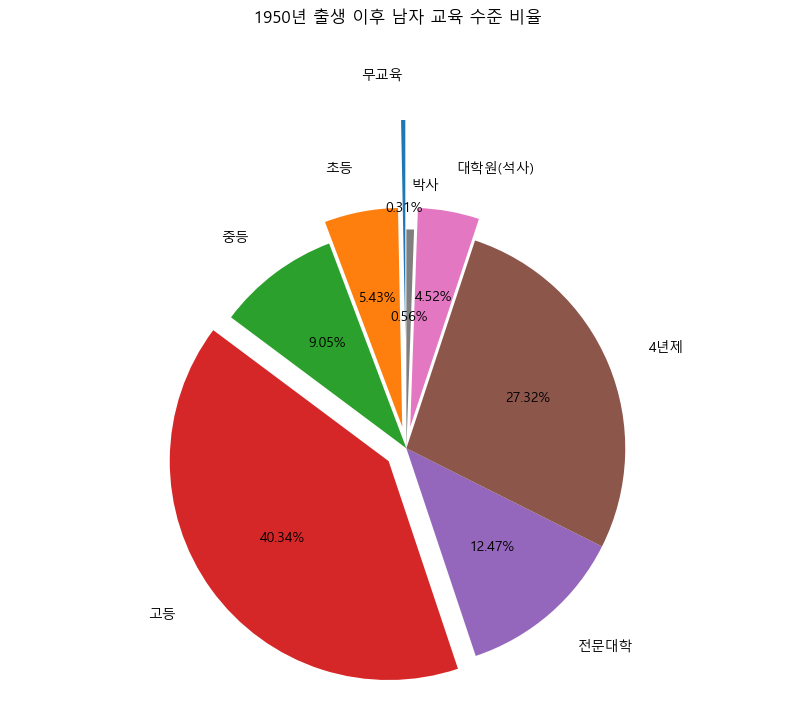

education_level
2     0.31
3     5.43
4     9.05
5    40.34
6    12.47
7    27.32
8     4.52
Name: 남자의 교육수준 비율, dtype: float64


In [540]:
labels = ['무교육', '초등', '중등', '고등', '전문대학', '4년제', '대학원(석사)', '박사']
sizes = edu.loc['남자의 교육수준 비율'].loc[:9]  # 예시 데이터로 대체
explode = (0.5, 0.1, 0, 0.1, 0, 0, 0.1, 0)  # 돌출된 부위

# Figure 크기 조정
fig, ax = plt.subplots(figsize=(10,8))  # 원하는 크기로 설정

plt.title("1950년 출생 이후 남자 교육 수준 비율", pad=50)
ax.pie(sizes, explode=explode, labels=labels, startangle=90, labeldistance=1.2,autopct='%1.2f%%')
ax.axis('equal')

plt.show()
print(edu.loc['남자의 교육수준 비율'].loc[:8])
#남자의 전문대 이상의 학력 소유 비율 =약 45%

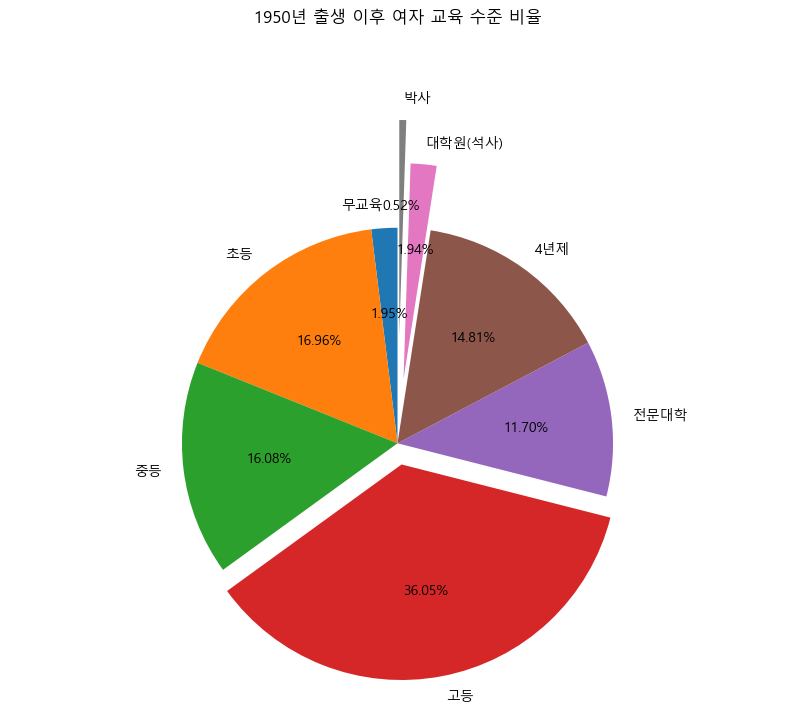

In [541]:
labels = ['무교육', '초등', '중등', '고등', '전문대학', '4년제', '대학원(석사)', '박사']
sizes = edu.loc['여자의 교육수준 비율'].loc[:9]  # 예시 데이터로 대체
explode = (0, 0, 0, 0.1, 0, 0, 0.3, 0.5)  # 돌출된 부위

# Figure 크기 조정
fig, ax = plt.subplots(figsize=(10,8))  # 원하는 크기로 설정


plt.title("1950년 출생 이후 여자 교육 수준 비율", pad=50)
ax.pie(sizes, explode=explode, labels=labels, startangle=90, labeldistance=1.1,autopct='%1.2f%%')
ax.axis('equal')


plt.show()
#여자의 전문대학 이상 학력 소유자: 약 28%

In [594]:
print(total.groupby(total.gender).income.mean()) #남녀 각각의 임금평균
print(total.income.mean() )#직장인의 총 평균

gender
1    5068.755537
2    2410.560360
Name: income, dtype: float64
4573.704005418321


In [542]:
#남녀 나이 구간별 소득 평균
total.income.fillna(0,inplace=True)

income_age=round(total.groupby(['age_range','gender']).income.mean(),2).unstack()

income_age

gender,1,2
age_range,,
"(17.922, 37.5]",5059.39,3183.03
"(37.5, 57.0]",6121.18,3236.98
"(57.0, 76.5]",3712.84,1780.87
"(76.5, 96.0]",1815.75,1246.82


gender
1    5068.755537
2    2410.560360
Name: income, dtype: float64

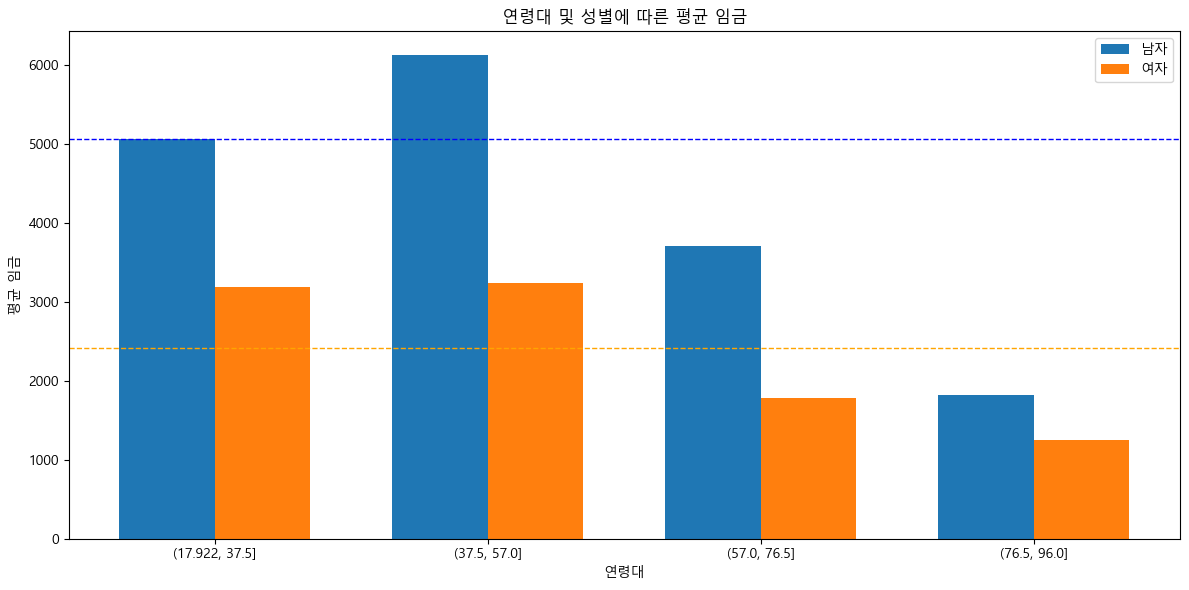

In [613]:
labels =total['age_range'].value_counts().sort_index().index #x축 라벨을 age_range의 값으로 지정
men_means = list(income_age[1][:])
women_means = list(income_age[2][:])

x = np.arange(len(labels))  # x=0~연령대 구간의 개수 까지
width = 0.35  # 막대 너비설정


fig, ax = plt.subplots(figsize=(12, 6)) 
bar1 = ax.bar(x - width/2, men_means, width, label='남자') #남자 막대를 bar1로 정의
bar2 = ax.bar(x + width/2, women_means, width, label='여자') #여자 막대를 bar2로 정의

ax.set_xlabel('연령대') # x축 이름을 연령대로
ax.set_ylabel('평균 임금') # y축 이름을 평균임금으로
ax.set_title('연령대 및 성별에 따른 평균 임금') # 히스토그램의 제목
ax.set_xticks(x) # x축 구간을 연령대 구간의 개수로 지정
ax.set_xticklabels(labels) #각 구간의 라벨을 연령대 구간으로 지정
ax.legend() #오른쪽 위에 막대가 어떤걸 나타내는지 띄워줌
avg_men = total.groupby('gender').income.mean().loc[1] # 남자 임금의 총 평균
avg_women =total.groupby('gender').income.mean().loc[2] # 여자 임금의 총 평균
ax.axhline(y=avg_men, color='blue', linestyle='--', linewidth=1, label='남자 평균 임금') # 남자 평균 임금 라인에 점선 그리기
ax.axhline(y=avg_women, color='orange', linestyle='--', linewidth=1, label='여자 평균 임금') # 여자 평균임금 라인에 점선그리기


fig.tight_layout()

plt.show()

In [533]:
#교육수준별 남녀 임금 차이
total2=total[total.education_level>=0]
edu_gen=round(total2.groupby(['gender','education_level']).income.mean(),2).unstack('education_level')
edu_gen



education_level,2,3,4,5,6,7,8,9
gender,,,,,,,,
1,1689.22,2646.66,3619.39,5096.1,5704.23,6934.42,7551.88,10480.73
2,1151.62,1760.32,2669.21,3162.8,3349.23,3594.08,4214.94,4273.86


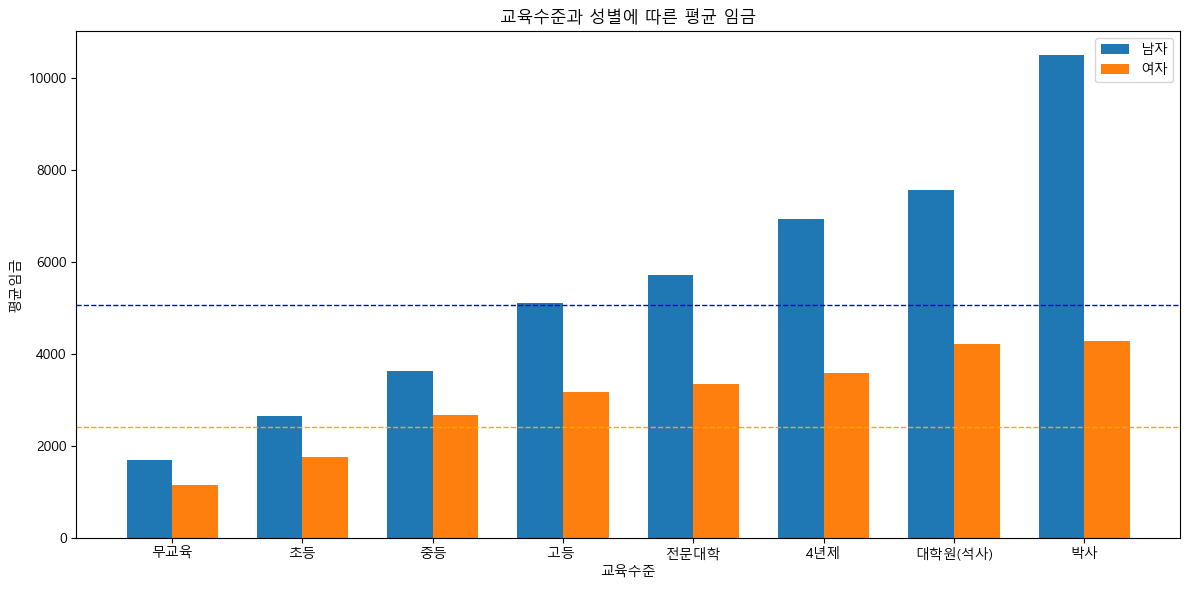

In [523]:
labels =edu_gen.columns #x축 라벨을 age_range의 값으로 지정
men_means = list(edu_gen.loc[1])
women_means = list(edu_gen.loc[2])

x = np.arange(len(labels))  # x=0~연령대 구간의 개수 까지
width = 0.35  # 막대 너비설정

# 히스토그램 그리기
fig, ax = plt.subplots(figsize=(12, 6)) 
bar1 = ax.bar(x - width/2, men_means, width, label='남자') #남자 막대를 bar1로 정의
bar2 = ax.bar(x + width/2, women_means, width, label='여자') #여자 막대를 bar2로 정의

ax.set_xlabel('교육수준') # x축 이름을 연령대로
ax.set_ylabel('평균임금') # y축 이름을 평균임금으로
ax.set_title('교육수준과 성별에 따른 평균 임금') # 히스토그램의 제목
ax.set_xticks(x) # x축 구간을 연령대 구간의 개수로 지정
ax.set_xticklabels(['무교육',  '초등' ,'중등', '고등 ','전문대학' ,'4년제', '대학원(석사)', '박사']) #각 구간의 라벨을 연령대 구간으로 지정
ax.legend() #오른쪽 위에 막대가 어떤걸 나타내는지 띄워줌
avg_men = total.groupby('gender').income.mean().loc[1] # 남자 임금의 총 평균
avg_women = total.groupby('gender').income.mean().loc[2] # 여자 임금의 총 평균
ax.axhline(y=avg_men, color='blue', linestyle='--', linewidth=1, label='남자 평균 임금') # 남자 평균 임금 라인에 점선 그리기
ax.axhline(y=avg_women, color='orange', linestyle='--', linewidth=1, label='여자 평균 임금') # 여자 평균임금 라인에 점선그리기
fig.tight_layout()

plt.show()

In [598]:
job_cnt=total.groupby(total.job_category).id.count()
job_cnt

job_category
1 관리자                   2095
2 전문가 및 관련 종사자          5310
3 사무 종사자                5776
4 서비스 종사자               3739
5 판매 종사자                3559
6 농림어업 숙련 종사자          10810
7 기능원 및 관련 기능 종사자       5235
8 장치ㆍ기계 조작 및 조립 종사자     6929
9 단순노무 종사자              9433
A 군인                     267
Name: id, dtype: int64

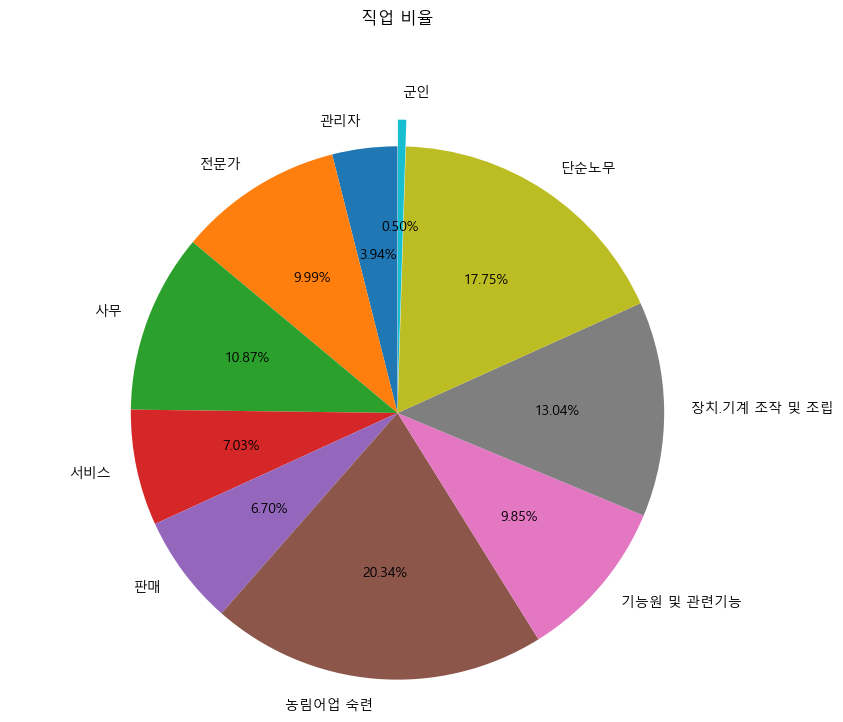

job_category
1 관리자                   3.94
2 전문가 및 관련 종사자          9.99
3 사무 종사자               10.87
4 서비스 종사자               7.03
5 판매 종사자                6.70
6 농림어업 숙련 종사자          20.34
7 기능원 및 관련 기능 종사자       9.85
8 장치ㆍ기계 조작 및 조립 종사자    13.04
9 단순노무 종사자             17.75
A 군인                    0.50
Name: id, dtype: float64

In [604]:
job_per=job_cnt/total.groupby(total.job_category).id.count().sum()*100
round(job_per,2)
labels = ['관리자','전문가','사무','서비스','판매', '농림어업 숙련','기능원 및 관련기능','장치.기계 조작 및 조립','단순노무','군인']
sizes = list(job_cnt)  # 예시 데이터로 대체
explode = (0, 0, 0, 0, 0, 0, 0, 0,0,0.1)  # 돌출된 부위

# Figure 크기 조정
fig, ax = plt.subplots(figsize=(10,8))  # 원하는 크기로 설정


plt.title("직업 비율", pad=50)
ax.pie(sizes, explode=explode, labels=labels, startangle=90, labeldistance=1.1,autopct='%1.2f%%')
ax.axis('equal')


plt.show()
round(job_per,2)

In [596]:
job_inc=total.groupby(total.job_category).income.mean() # 직업 카테고리 별 평균 임금
job_inc

job_category
1 관리자                  8538.957995
2 전문가 및 관련 종사자         6521.323164
3 사무 종사자               6350.878463
4 서비스 종사자              4399.773469
5 판매 종사자               5270.220849
6 농림어업 숙련 종사자          2468.997687
7 기능원 및 관련 기능 종사자      5256.213945
8 장치ㆍ기계 조작 및 조립 종사자    5074.282869
9 단순노무 종사자             2958.992685
A 군인                   5320.501873
Name: income, dtype: float64

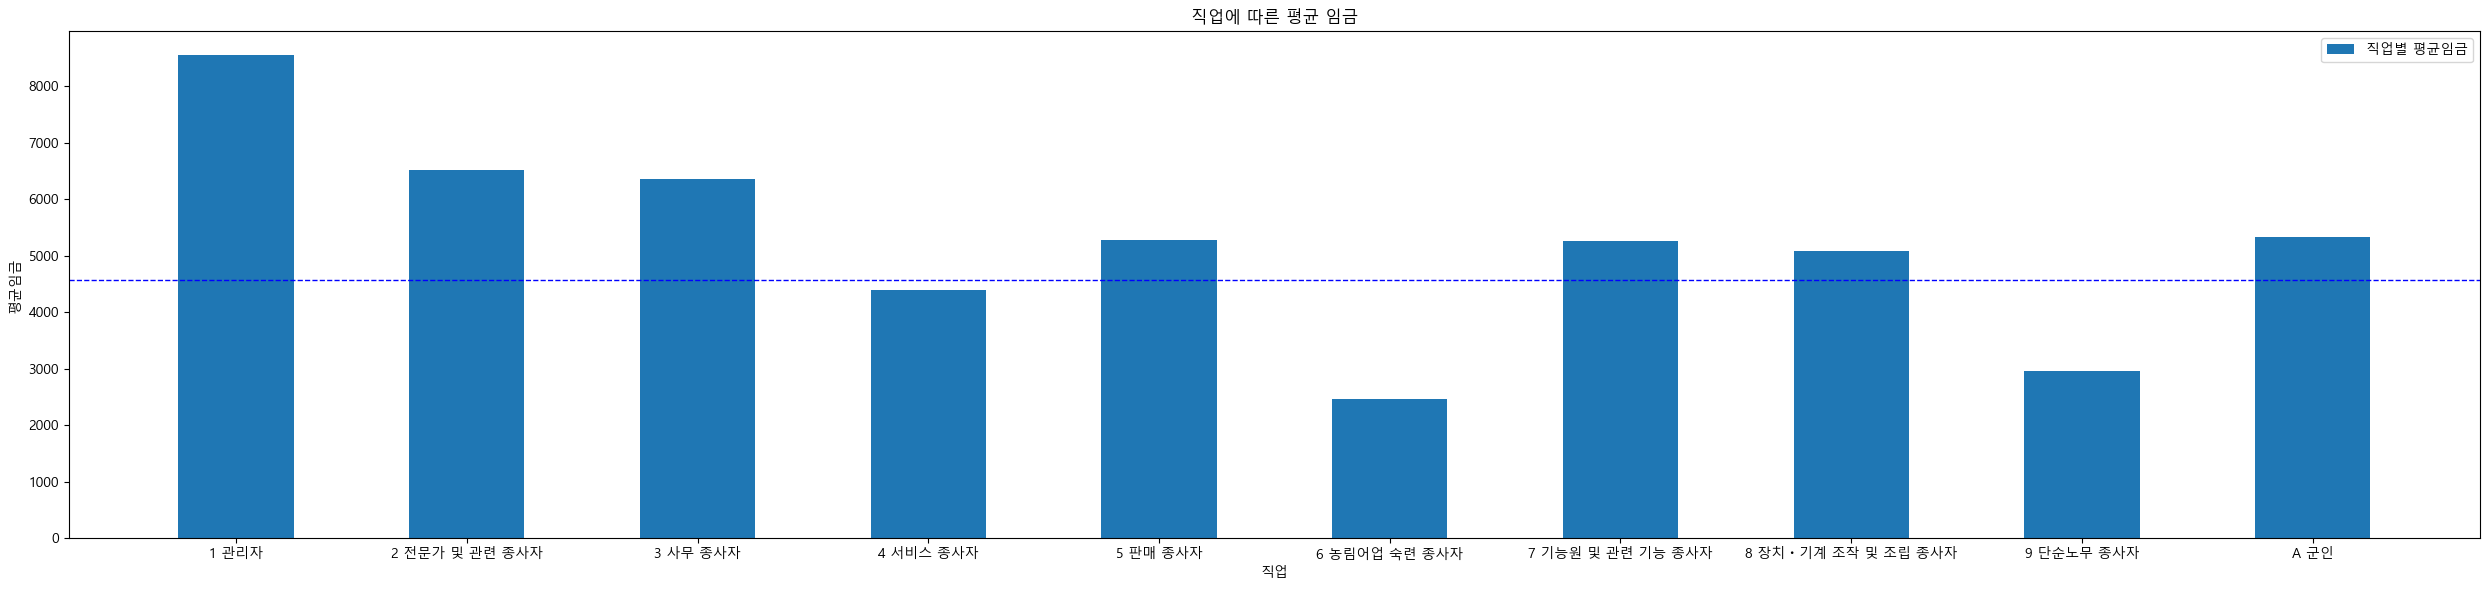

In [597]:
labels =job_inc.index #x축 라벨을 age_range의 값으로 지정
job_means = list(round(job_inc,2))


x = np.arange(len(labels))  # x=0~연령대 구간의 개수 까지
width = 0.5  # 막대 너비설정

# 히스토그램 그리기
fig, ax = plt.subplots(figsize=(25, 6)) 
bar1 = ax.bar(x, job_means, width, label='직업별 평균임금') #남자 막대를 bar1로 정의


ax.set_xlabel('직업') # x축 이름을 직업으로
ax.set_ylabel('평균임금') # y축 이름을 평균임금으로
ax.set_title('직업에 따른 평균 임금') # 히스토그램의 제목
ax.set_xticks(x) # x축 구간을  직업의 개수로 지정
ax.set_xticklabels(job_inc.index) #각 구간의 라벨을 직업으로
ax.legend() #오른쪽 위에 막대가 어떤걸 나타내는지 띄워줌
avg_income = total.income.mean() # 직장인의 총 평균임금

ax.axhline(y=avg_income, color='blue', linestyle='--', linewidth=1, label='남자 평균 임금') # 직장인의 총 평균임금에 라인 그리기

fig.tight_layout()

plt.show()